# Набор данных IMDB с 50 тыс. отзывов о фильмах на английском языке - Бинарная классификация. Наивный байесовский классификатор (Naive Bayes classifier)

Набор данных IMDB, содержащий 50 тысяч отзывов о фильмах на английском языке для обработки естественного языка или анализа текста.

Это набор данных для бинарной классификации настроений, содержащий значительно больше данных, чем предыдущие наборы эталонных данных. Мы предоставляем набор из 50 000 крайне полярных отзывов о фильмах для обучения и тестирования моделей. Итак, спрогнозируйте количество положительных и отрицательных отзывов, используя классификацию.

Предсказание тональности отзывов о фильмах может быть полезным для компаний в развлекательной и киноиндустрии для анализа общественного мнения о своих продуктах, понимания потребностей аудитории и улучшения качества контента. Это также может помочь в разработке маркетинговых стратегий и прогнозировании популярности будущих проектов.

## О наборе данных

| Признак на английском | Перевод на русский |
|---|---|
| review | отзыв о фильме (на английском языке)|

**Target variable (целевая переменная): sentiment - positive or negative (тональность отзыва - позитивная или негативная)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load the Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/IMDB Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


# Exploratory Data Analysis (EDA)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


В наборе данных пропусков нет

In [ ]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
data.describe(include="object")

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


Видим, что в наборе данных имеются дубликаты - удалим их

In [ ]:
data = data.drop_duplicates()
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
data.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


In [ ]:
data.describe(include="object")

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


Теперь в наборе данных все объекты уникальные

In [ ]:
data["sentiment"].nunique()

2

Количество уникальных меток классов действительно 2 (позитивный или негативный отзыв)

In [ ]:
data.columns

Index(['review', 'sentiment'], dtype='object')

<Axes: >

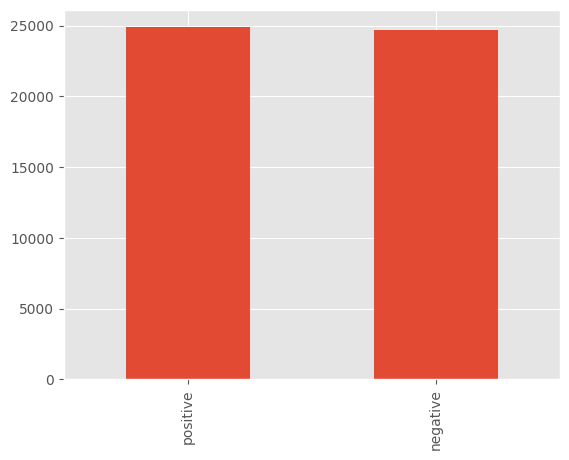

In [ ]:
data.sentiment.value_counts().plot(kind = 'bar')

In [ ]:
positive_count = (data['sentiment'] == 'positive').sum()
negative_count = (data['sentiment'] == 'negative').sum()

positive_count, negative_count

(24884, 24698)

Видим, что классы целевой переменной практически сбалансированные

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


 # Data preprocessing

## Лемматизация текста

In [ ]:
# Инициализация лемматизатора
lemmatizer = WordNetLemmatizer()

# Функция для лемматизации текста
def lemmatize_text(text):
    tokens = word_tokenize(text)  # Токенизация текста
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Лемматизация токенов
    return ' '.join(lemmatized_tokens)

# Применение лемматизации к столбцу 'review'
data['review_lemmatized'] = data['review'].apply(lemmatize_text)

In [ ]:
data

,review,sentiment,review_lemmatized
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewer ha mentioned that af...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production . < br / > < br ...
2,I thought this was a wonderful way to spend ti...,positive,I thought this wa a wonderful way to spend tim...
3,Basically there's a family where a little boy ...,negative,Basically there 's a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Mattei 's `` Love in the Time of Money ...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"Bad plot , bad dialogue , bad acting , idiotic..."
49997,I am a Catholic taught in parochial elementary...,negative,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,I 'm going to have to disagree with the previo...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49582 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review             49582 non-null  object
 1   sentiment          49582 non-null  object
 2   review_lemmatized  49582 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


In [ ]:
data.describe()

,review,sentiment,review_lemmatized
count,49582,49582,49582
unique,49582,2,49580
top,One of the other reviewers has mentioned that ...,positive,How Tasty Was My Little Frenchman tell a story...
freq,1,24884,2


Видим, что в наборе данных появились дубликаты - удалим их

In [ ]:
data = data.drop_duplicates(subset=['review_lemmatized'])
data

,review,sentiment,review_lemmatized
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewer ha mentioned that af...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production . < br / > < br ...
2,I thought this was a wonderful way to spend ti...,positive,I thought this wa a wonderful way to spend tim...
3,Basically there's a family where a little boy ...,negative,Basically there 's a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Mattei 's `` Love in the Time of Money ...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"Bad plot , bad dialogue , bad acting , idiotic..."
49997,I am a Catholic taught in parochial elementary...,negative,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,I 'm going to have to disagree with the previo...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49580 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review             49580 non-null  object
 1   sentiment          49580 non-null  object
 2   review_lemmatized  49580 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


In [ ]:
data.describe()

,review,sentiment,review_lemmatized
count,49580,49580,49580
unique,49580,2,49580
top,One of the other reviewers has mentioned that ...,positive,One of the other reviewer ha mentioned that af...
freq,1,24882,1


Теперь в наборе данных все объекты уникальные

## Токенизация и векторизация текста с использованием мешка слов БЕЗ учёта ЧАСТОТЫ вхождения каждого слова из словаря в текстах

In [ ]:
#Первая строкя нормализованных признаков в разреженной матрице формата CSR
from scipy.sparse import csr_matrix

In [ ]:
# Создание мешка слов на основе лемматизированных текстов
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(data['review_lemmatized'])
# Приведение меток классов к числовому формату
y = [1 if sentiment == "positive" else 0 for sentiment in data['sentiment']]

from sklearn.utils import shuffle
# перемешиваем данные
X, y = shuffle(X, y)

In [ ]:
sparse_X = csr_matrix(X)
print(sparse_X[:3])

  (0, 61392)	1
  (0, 61030)	1
  (0, 86006)	1
  (0, 38007)	1
  (0, 85984)	1
  (0, 96510)	1
  (0, 5545)	1
  (0, 86292)	1
  (0, 44627)	1
  (0, 11602)	1
  (0, 93222)	1
  (0, 44763)	1
  (0, 4428)	1
  (0, 42737)	1
  (0, 33798)	1
  (0, 32883)	1
  (0, 87018)	1
  (0, 61371)	1
  (0, 4305)	1
  (0, 39069)	1
  (0, 79700)	1
  (0, 94125)	1
  (0, 42133)	1
  (0, 13755)	1
  (0, 92296)	1
  :	:
  (2, 94765)	1
  (2, 62872)	1
  (2, 33592)	1
  (2, 53520)	1
  (2, 82227)	1
  (2, 43999)	1
  (2, 76291)	1
  (2, 25037)	1
  (2, 13206)	1
  (2, 63324)	1
  (2, 23016)	1
  (2, 60875)	1
  (2, 92324)	1
  (2, 55845)	1
  (2, 50731)	1
  (2, 76733)	1
  (2, 67915)	1
  (2, 74291)	1
  (2, 71591)	1
  (2, 62883)	1
  (2, 11740)	1
  (2, 27439)	1
  (2, 16880)	1
  (2, 17586)	1
  (2, 22696)	1


# Model Train and Predict

## Библиотека функций

### Функция для подсчета метрик качества модели бинарной классификации

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

def calculate_classification_metrics(y_true, y_pred, y_pred_proba, model_name, threshold=None):
    """
    Функция для подсчета метрик качества модели классификации.

    Аргументы:
    y_true -- истинные значения целевой переменной
    y_pred -- предсказанные значения целевой переменной
    y_pred_proba -- вероятности предсказаний (для бинарной классификации)
    model_name -- название модели
    threshold -- порог для классификации (по умолчанию None)

    Возвращает словарь с названиями метрик и их значениями.
    """
    metrics = {'Model': model_name}

    if len(np.unique(y_true)) == 2:  # Бинарная классификация
        if threshold is not None:
            y_pred_thresholded = (y_pred_proba[:, 1] >= threshold).astype(int)
            metrics['Accuracy'] = accuracy_score(y_true, y_pred_thresholded)
            metrics['ROC AUC'] = roc_auc_score(y_true, y_pred_proba[:, 1])
            metrics['Precision'] = precision_score(y_true, y_pred_thresholded)
            metrics['Recall'] = recall_score(y_true, y_pred_thresholded)
            metrics['F1 Score'] = f1_score(y_true, y_pred_thresholded)
            metrics['Confusion Matrix'] = confusion_matrix(y_true, y_pred_thresholded).tolist()
        else:
            metrics['Accuracy'] = accuracy_score(y_true, y_pred)
            metrics['ROC AUC'] = roc_auc_score(y_true, y_pred_proba[:, 1])
            metrics['Precision'] = precision_score(y_true, y_pred)
            metrics['Recall'] = recall_score(y_true, y_pred)
            metrics['F1 Score'] = f1_score(y_true, y_pred)
            metrics['Confusion Matrix'] = confusion_matrix(y_true, y_pred).tolist()
    else:  # Многоклассовая классификация
        metrics['Accuracy'] = accuracy_score(y_true, y_pred)
        metrics['Precision (Micro)'] = precision_score(y_true, y_pred, average='micro')
        metrics['Recall (Micro)'] = recall_score(y_true, y_pred, average='micro')
        metrics['F1 Score (Micro)'] = f1_score(y_true, y_pred, average='micro')
        metrics['Precision (Macro)'] = precision_score(y_true, y_pred, average='macro')
        metrics['Recall (Macro)'] = recall_score(y_true, y_pred, average='macro')
        metrics['F1 Score (Macro)'] = f1_score(y_true, y_pred, average='macro')
        metrics['Confusion Matrix'] = confusion_matrix(y_true, y_pred).tolist()

    return metrics

## Без использования масштабирования признаков

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[:10000], y[:10000], test_size=0.2, random_state=42)

### Модель Gauss №1. Гауссовский наивный байесовский метод

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
y_pred_proba = gnb.predict_proba(X_test.toarray())

In [ ]:
metrics_9 = calculate_classification_metrics(y_test, y_pred, y_pred_proba, 'Model Naive Bayes №9')
print("Метрики качества модели:")
for metric, value in metrics_9.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model Naive Bayes №9
Accuracy: 0.647
ROC AUC: 0.6449244319887899
Precision: 0.6594202898550725
Recall: 0.5628865979381443
F1 Score: 0.6073414905450502
Confusion Matrix: [[748, 282], [424, 546]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68      1030
           1       0.66      0.56      0.61       970

    accuracy                           0.65      2000
   macro avg       0.65      0.64      0.64      2000
weighted avg       0.65      0.65      0.64      2000



<Axes: >

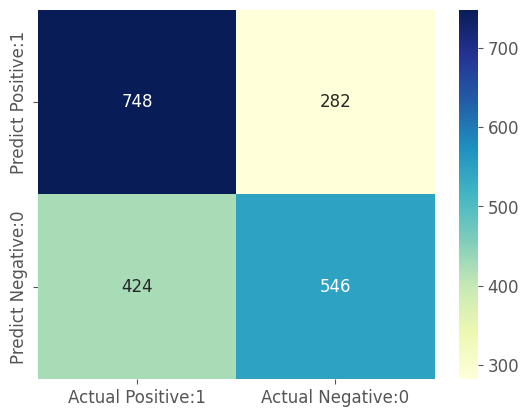

In [ ]:
lr_confusion_matrix = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=lr_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Модель №1. Полиномиальный наивный байесовский метод

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(force_alpha=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [ ]:
metrics_1 = calculate_classification_metrics(y_test, y_pred, y_pred_proba, 'Model Naive Bayes №1')
print("Метрики качества модели:")
for metric, value in metrics_1.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model Naive Bayes №1
Accuracy: 0.8490318676885841
ROC AUC: 0.922529036696712
Precision: 0.8677843803056027
Recall: 0.8238968365907717
F1 Score: 0.8452713178294573
Confusion Matrix: [[4330, 623], [874, 4089]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      4953
           1       0.87      0.82      0.85      4963

    accuracy                           0.85      9916
   macro avg       0.85      0.85      0.85      9916
weighted avg       0.85      0.85      0.85      9916



<Axes: >

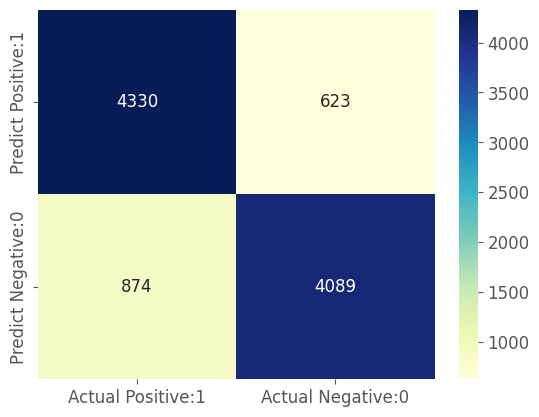

In [ ]:
lr_confusion_matrix = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=lr_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Модель №2. Наивный байесовский метод Бернулли

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(force_alpha=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [ ]:
metrics_2 = calculate_classification_metrics(y_test, y_pred, y_pred_proba, 'Model Naive Bayes №2')
print("Метрики качества модели:")
for metric, value in metrics_2.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model Naive Bayes №2
Accuracy: 0.8507462686567164
ROC AUC: 0.922094283077369
Precision: 0.8627369298062904
Recall: 0.8345758613741688
F1 Score: 0.8484227775501845
Confusion Matrix: [[4294, 659], [821, 4142]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      4953
           1       0.86      0.83      0.85      4963

    accuracy                           0.85      9916
   macro avg       0.85      0.85      0.85      9916
weighted avg       0.85      0.85      0.85      9916



<Axes: >

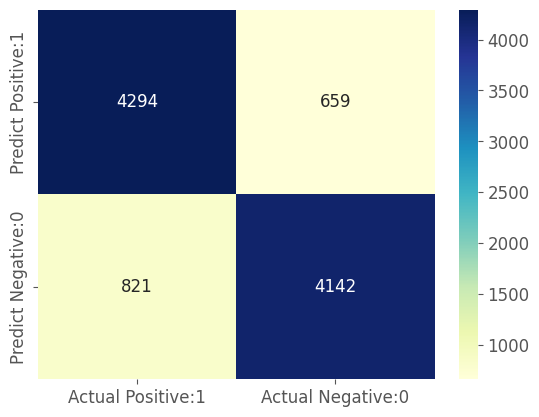

In [ ]:
lr_confusion_matrix = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=lr_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## С использованием масштабирования признаков

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Масштабирование признаков

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler(with_centering=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
sparse_norm_features_train = csr_matrix(X_train)
print(sparse_norm_features_train[:3])

print('--------------------------------------------------------')

sparse_norm_features_test = csr_matrix(X_test)
print(sparse_norm_features_test[:3])

  (0, 178)	1.0
  (0, 961)	1.0
  (0, 1853)	1.0
  (0, 2131)	1.0
  (0, 3635)	1.0
  (0, 3956)	1.0
  (0, 4305)	1.0
  (0, 4428)	1.0
  (0, 4888)	1.0
  (0, 5545)	1.0
  (0, 6360)	1.0
  (0, 7004)	1.0
  (0, 8922)	1.0
  (0, 10358)	1.0
  (0, 11602)	1.0
  (0, 13139)	1.0
  (0, 15393)	1.0
  (0, 17988)	1.0
  (0, 19390)	1.0
  (0, 23830)	1.0
  (0, 24084)	1.0
  (0, 25219)	1.0
  (0, 27318)	1.0
  (0, 29531)	1.0
  (0, 29629)	1.0
  :	:
  (2, 79334)	1.0
  (2, 80011)	1.0
  (2, 82258)	1.0
  (2, 82844)	1.0
  (2, 85838)	1.0
  (2, 86006)	1.0
  (2, 86048)	1.0
  (2, 86292)	1.0
  (2, 86744)	1.0
  (2, 87018)	1.0
  (2, 87549)	1.0
  (2, 91976)	1.0
  (2, 93222)	1.0
  (2, 93729)	1.0
  (2, 93737)	1.0
  (2, 93882)	1.0
  (2, 94338)	1.0
  (2, 94452)	1.0
  (2, 94857)	1.0
  (2, 95196)	1.0
  (2, 95567)	1.0
  (2, 95685)	1.0
  (2, 96267)	1.0
  (2, 96356)	1.0
  (2, 96510)	1.0
--------------------------------------------------------
  (0, 1853)	1.0
  (0, 2341)	1.0
  (0, 2910)	1.0
  (0, 2936)	1.0
  (0, 3252)	1.0
  (0, 3635)	1.0
  (0, 

### Модель №3. Полиномиальный наивный байесовский метод

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(force_alpha=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [ ]:
metrics_3 = calculate_classification_metrics(y_test, y_pred, y_pred_proba, 'Model Naive Bayes №3')
print("Метрики качества модели:")
for metric, value in metrics_3.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model Naive Bayes №3
Accuracy: 0.8490318676885841
ROC AUC: 0.922529036696712
Precision: 0.8677843803056027
Recall: 0.8238968365907717
F1 Score: 0.8452713178294573
Confusion Matrix: [[4330, 623], [874, 4089]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      4953
           1       0.87      0.82      0.85      4963

    accuracy                           0.85      9916
   macro avg       0.85      0.85      0.85      9916
weighted avg       0.85      0.85      0.85      9916



<Axes: >

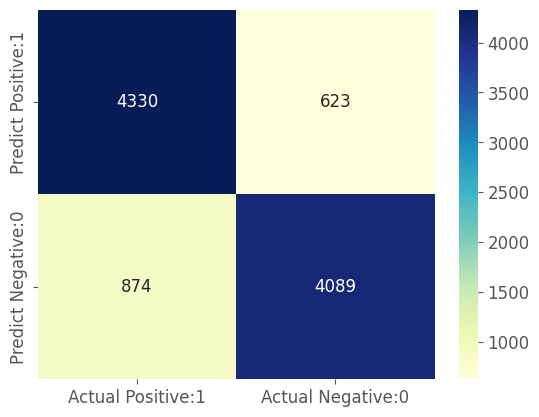

In [ ]:
lr_confusion_matrix = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=lr_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Модель №4. Наивный байесовский метод Бернулли

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(force_alpha=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [ ]:
metrics_4 = calculate_classification_metrics(y_test, y_pred, y_pred_proba, 'Model Naive Bayes №4')
print("Метрики качества модели:")
for metric, value in metrics_4.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model Naive Bayes №4
Accuracy: 0.8507462686567164
ROC AUC: 0.922094283077369
Precision: 0.8627369298062904
Recall: 0.8345758613741688
F1 Score: 0.8484227775501845
Confusion Matrix: [[4294, 659], [821, 4142]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      4953
           1       0.86      0.83      0.85      4963

    accuracy                           0.85      9916
   macro avg       0.85      0.85      0.85      9916
weighted avg       0.85      0.85      0.85      9916



<Axes: >

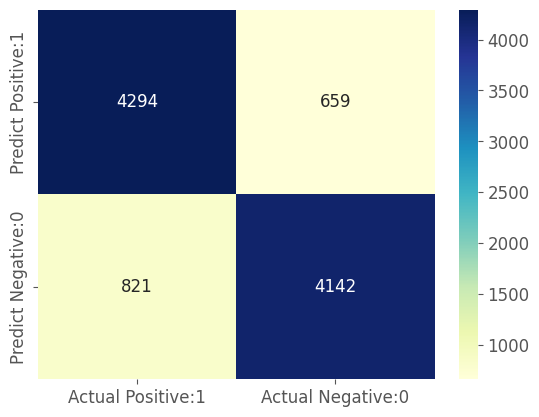

In [ ]:
lr_confusion_matrix = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=lr_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Токенизация и векторизация текста с использованием мешка слов С учётом ЧАСТОТЫ вхождения каждого слова из словаря в текстах

In [ ]:
# Создание мешка слов на основе лемматизированных текстов
vectorizer = CountVectorizer(binary=False)
X = vectorizer.fit_transform(data['review_lemmatized'])
# Приведение меток классов к числовому формату
y = [1 if sentiment == "positive" else 0 for sentiment in data['sentiment']]

from sklearn.utils import shuffle
# перемешиваем данные
X, y = shuffle(X, y)

In [ ]:
sparse_X = csr_matrix(X)
print(sparse_X[:3])

  (0, 61392)	3
  (0, 61030)	5
  (0, 86006)	9
  (0, 85984)	1
  (0, 96510)	1
  (0, 8468)	1
  (0, 86292)	3
  (0, 44627)	1
  (0, 93222)	4
  (0, 44763)	1
  (0, 4428)	2
  (0, 42737)	2
  (0, 33798)	1
  (0, 36083)	1
  (0, 60228)	1
  (0, 32883)	1
  (0, 61666)	1
  (0, 3635)	2
  (0, 39069)	2
  (0, 57219)	1
  (0, 95685)	1
  (0, 67347)	1
  (0, 5780)	2
  (0, 42133)	1
  (0, 67651)	1
  :	:
  (2, 11395)	1
  (2, 12842)	1
  (2, 65310)	2
  (2, 16205)	1
  (2, 1665)	1
  (2, 26293)	2
  (2, 22977)	1
  (2, 44262)	1
  (2, 94322)	1
  (2, 68460)	1
  (2, 7830)	1
  (2, 92883)	2
  (2, 15344)	1
  (2, 95089)	1
  (2, 88220)	1
  (2, 33272)	1
  (2, 88215)	1
  (2, 80118)	2
  (2, 15895)	4
  (2, 18616)	1
  (2, 90006)	1
  (2, 10777)	1
  (2, 22165)	1
  (2, 15348)	1
  (2, 93123)	1


## Без использования масштабирования признаков

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Модель №5. Полиномиальный наивный байесовский метод

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(force_alpha=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [ ]:
metrics_5 = calculate_classification_metrics(y_test, y_pred, y_pred_proba, 'Model Naive Bayes №5')
print("Метрики качества модели:")
for metric, value in metrics_5.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model Naive Bayes №5
Accuracy: 0.8490318676885841
ROC AUC: 0.917557200653373
Precision: 0.8663914838149033
Recall: 0.8188911704312115
F1 Score: 0.8419719201942362
Confusion Matrix: [[4431, 615], [882, 3988]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      5046
           1       0.87      0.82      0.84      4870

    accuracy                           0.85      9916
   macro avg       0.85      0.85      0.85      9916
weighted avg       0.85      0.85      0.85      9916



<Axes: >

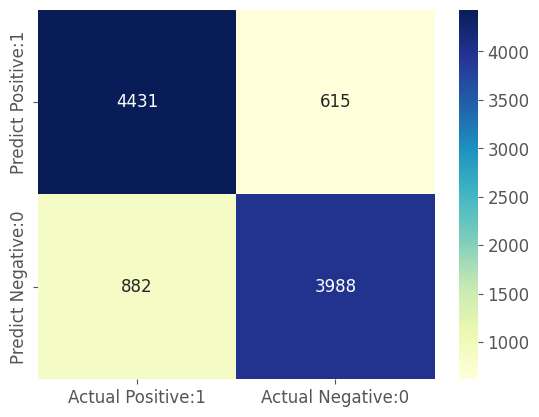

In [ ]:
lr_confusion_matrix = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=lr_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Модель №6. Наивный байесовский метод Бернулли

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(force_alpha=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [ ]:
metrics_6 = calculate_classification_metrics(y_test, y_pred, y_pred_proba, 'Model Naive Bayes №6')
print("Метрики качества модели:")
for metric, value in metrics_6.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model Naive Bayes №6
Accuracy: 0.8538725292456636
ROC AUC: 0.9247456256648282
Precision: 0.8668239330902853
Recall: 0.8299794661190965
F1 Score: 0.848001678380363
Confusion Matrix: [[4425, 621], [828, 4042]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      5046
           1       0.87      0.83      0.85      4870

    accuracy                           0.85      9916
   macro avg       0.85      0.85      0.85      9916
weighted avg       0.85      0.85      0.85      9916



<Axes: >

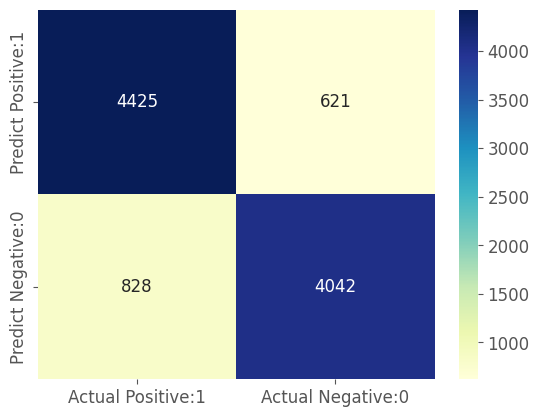

In [ ]:
lr_confusion_matrix = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=lr_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## С использованием масштабирования признаков

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Масштабирование признаков

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler(with_centering=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
sparse_norm_features_train = csr_matrix(X_train)
print(sparse_norm_features_train[:3])

print('--------------------------------------------------------')

sparse_norm_features_test = csr_matrix(X_test)
print(sparse_norm_features_test[:3])

  (0, 2291)	2.0
  (0, 2903)	1.0
  (0, 4305)	1.0
  (0, 4428)	0.2
  (0, 5545)	1.0
  (0, 5780)	1.0
  (0, 7004)	1.0
  (0, 7265)	1.0
  (0, 7352)	1.0
  (0, 8468)	0.5
  (0, 9761)	1.0
  (0, 11640)	1.0
  (0, 13139)	0.5
  (0, 22742)	1.0
  (0, 25777)	1.0
  (0, 29806)	1.0
  (0, 29969)	1.0
  (0, 31197)	1.0
  (0, 31737)	0.6666666666666666
  (0, 33798)	1.0
  (0, 35778)	1.0
  (0, 39069)	0.5
  (0, 39561)	1.0
  (0, 41059)	1.0
  (0, 41236)	1.0
  :	:
  (2, 83715)	1.0
  (2, 84616)	1.0
  (2, 85955)	3.0
  (2, 85984)	2.0
  (2, 86006)	1.0909090909090908
  (2, 86130)	2.0
  (2, 86292)	1.0
  (2, 86744)	1.0
  (2, 87018)	1.0
  (2, 87785)	1.0
  (2, 88878)	1.0
  (2, 89129)	1.0
  (2, 89209)	1.0
  (2, 89927)	2.0
  (2, 93222)	2.6666666666666665
  (2, 93545)	1.0
  (2, 93744)	2.0
  (2, 94192)	1.0
  (2, 94338)	2.0
  (2, 94440)	1.0
  (2, 94452)	1.0
  (2, 94606)	1.0
  (2, 95196)	0.5
  (2, 95685)	2.0
  (2, 96510)	2.0
--------------------------------------------------------
  (0, 1853)	2.0
  (0, 1913)	1.0
  (0, 2710)	1.0
  (0,

### Модель №7. Полиномиальный наивный байесовский метод

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(force_alpha=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [ ]:
metrics_7 = calculate_classification_metrics(y_test, y_pred, y_pred_proba, 'Model Naive Bayes №7')
print("Метрики качества модели:")
for metric, value in metrics_7.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model Naive Bayes №7
Accuracy: 0.8539733763614361
ROC AUC: 0.9201980791095636
Precision: 0.8695464362850972
Recall: 0.826694045174538
F1 Score: 0.8475789473684211
Confusion Matrix: [[4442, 604], [844, 4026]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      5046
           1       0.87      0.83      0.85      4870

    accuracy                           0.85      9916
   macro avg       0.85      0.85      0.85      9916
weighted avg       0.85      0.85      0.85      9916



<Axes: >

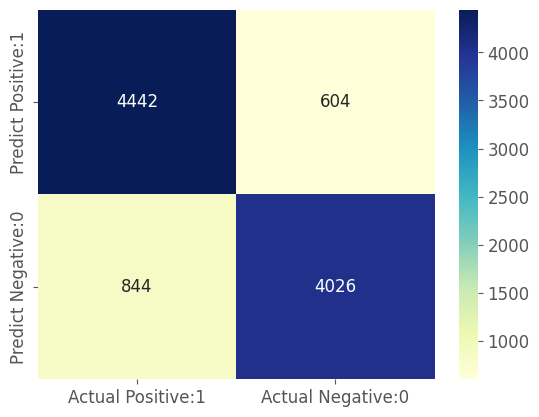

In [ ]:
lr_confusion_matrix = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=lr_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

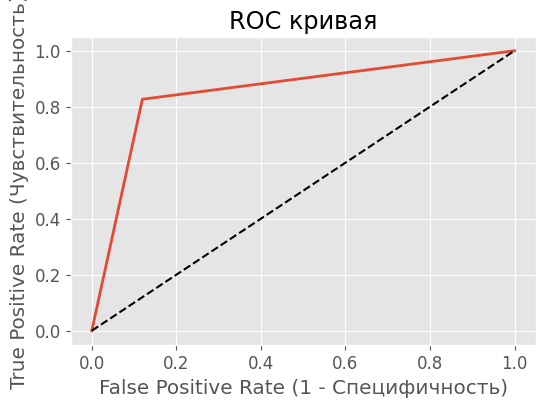

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC кривая')

plt.xlabel('False Positive Rate (1 - Специфичность)')

plt.ylabel('True Positive Rate (Чувствительность)')

plt.show()

## PR-кривая

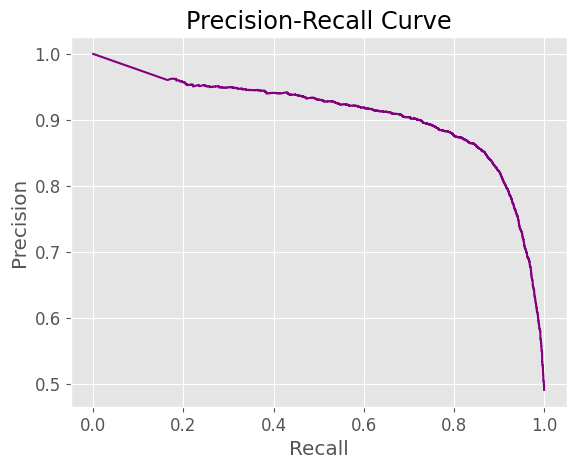

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

 ## Подбор оптимального порога

In [ ]:
from sklearn.metrics import accuracy_score

best_accuracy = 0
best_threshold = 0

for threshold in thresholds:
    y_pred_thresholded = (y_pred_proba[:, 1] >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_thresholded)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

# Применяем порог к вероятностям класса 1
y_pred_thresholded = (y_pred_proba[:, 1] >= best_threshold).astype(int)

print("Оптимальный порог по accuracy:", best_threshold)

Оптимальный порог по accuracy: 0.14363036585774216


## Оценка метрик качества модели с применением лучшего порога

In [ ]:
# Вызываем функцию calculate_classification_metrics с заданным порогом
metrics_7_1 = calculate_classification_metrics(y_test, y_pred, y_pred_proba, 'Model Naive Bayes №7_1', threshold=best_threshold)

print("Метрики качества модели:")
for metric, value in metrics_7_1.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model Naive Bayes №7_1
Accuracy: 0.8607301331181928
ROC AUC: 0.9201980791095636
Precision: 0.8509354254677127
Recall: 0.8685831622176592
F1 Score: 0.8596687328523525
Confusion Matrix: [[4305, 741], [640, 4230]]


In [ ]:
from sklearn.metrics import classification_report
# Выводим отчет о классификации
print(classification_report(y_test, y_pred_thresholded))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5046
           1       0.85      0.87      0.86      4870

    accuracy                           0.86      9916
   macro avg       0.86      0.86      0.86      9916
weighted avg       0.86      0.86      0.86      9916



<Axes: >

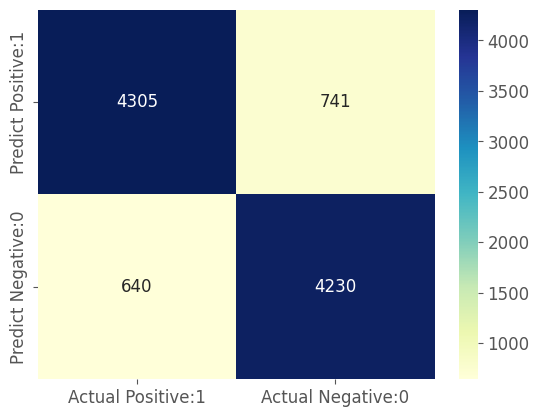

In [ ]:
# Строим матрицу ошибок
lr_confusion_matrix = confusion_matrix(y_test, y_pred_thresholded)
cm_matrix = pd.DataFrame(data=lr_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

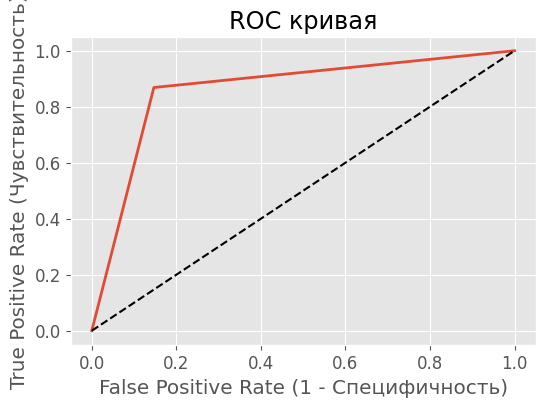

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_thresholded, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC кривая')

plt.xlabel('False Positive Rate (1 - Специфичность)')

plt.ylabel('True Positive Rate (Чувствительность)')

plt.show()

## PR-кривая

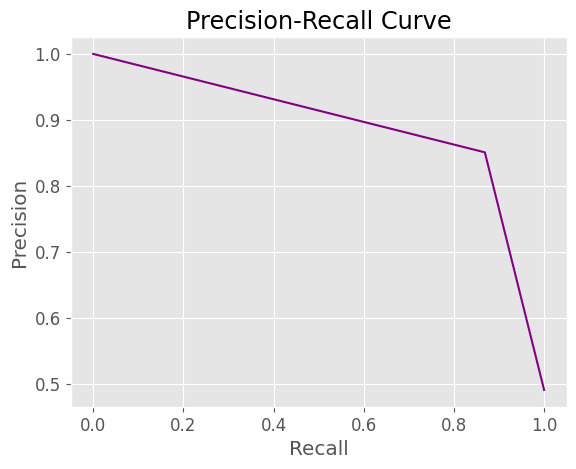

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_thresholded)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

### Модель №8. Наивный байесовский метод Бернулли

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(force_alpha=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [ ]:
metrics_8 = calculate_classification_metrics(y_test, y_pred, y_pred_proba, 'Model Naive Bayes №8')
print("Метрики качества модели:")
for metric, value in metrics_8.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model Naive Bayes №8
Accuracy: 0.8538725292456636
ROC AUC: 0.9247456256648282
Precision: 0.8668239330902853
Recall: 0.8299794661190965
F1 Score: 0.848001678380363
Confusion Matrix: [[4425, 621], [828, 4042]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      5046
           1       0.87      0.83      0.85      4870

    accuracy                           0.85      9916
   macro avg       0.85      0.85      0.85      9916
weighted avg       0.85      0.85      0.85      9916



<Axes: >

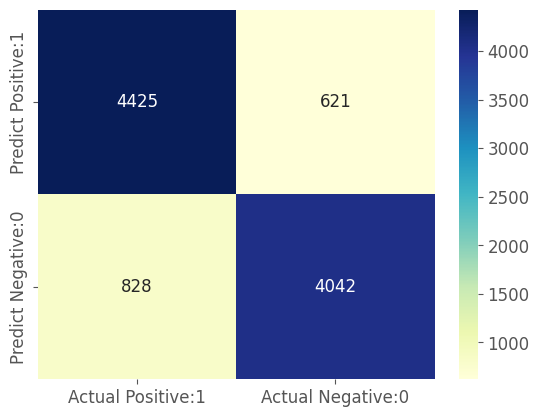

In [ ]:
lr_confusion_matrix = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=lr_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Model Evaluation

In [ ]:
model_metrics_1_filtered = {key: value for key, value in metrics_1.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}

model_metrics_2_filtered = {key: value for key, value in metrics_2.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}

model_metrics_3_filtered = {key: value for key, value in metrics_3.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}

model_metrics_4_filtered = {key: value for key, value in metrics_4.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}

model_metrics_5_filtered = {key: value for key, value in metrics_5.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}

model_metrics_6_filtered = {key: value for key, value in metrics_6.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}

model_metrics_7_filtered = {key: value for key, value in metrics_7.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}

model_metrics_7_1_filtered = {key: value for key, value in metrics_7_1.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}

model_metrics_8_filtered = {key: value for key, value in metrics_8.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}

model_metrics_9_filtered = {key: value for key, value in metrics_9.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}

# Создание DataFrame
df = pd.DataFrame({
    "Model №1": model_metrics_1_filtered,
    "Model №2": model_metrics_2_filtered,
    "Model №3": model_metrics_3_filtered,
    "Model №4": model_metrics_4_filtered,
    "Model №5": model_metrics_5_filtered,
    "Model №6": model_metrics_6_filtered,
    "Model №7": model_metrics_7_filtered,
    "Model №7_optimal": model_metrics_7_1_filtered,
    "Model №8": model_metrics_8_filtered,
    "Model №9": model_metrics_9_filtered
})

# Функция для форматирования значений
def format_values(value):
    if isinstance(value, float):
        return "{:.8f}".format(value)
    else:
        return value

# Применение функции к каждому элементу DataFrame
df = df.applymap(format_values)

# Вывод DataFrame как красивой таблицы
display(df)

,Model №1,Model №2,Model №3,Model №4,Model №5,Model №6,Model №7,Model №7_optimal,Model №8,Model №9
Accuracy,0.84903187,0.85074627,0.84903187,0.85074627,0.84903187,0.85387253,0.85397338,0.86073013,0.85387253,0.64700000
ROC AUC,0.92252904,0.92209428,0.92252904,0.92209428,0.91755720,0.92474563,0.92019808,0.92019808,0.92474563,0.64492443
Precision,0.86778438,0.86273693,0.86778438,0.86273693,0.86639148,0.86682393,0.86954644,0.85093543,0.86682393,0.65942029
Recall,0.82389684,0.83457586,0.82389684,0.83457586,0.81889117,0.82997947,0.82669405,0.86858316,0.82997947,0.56288660
F1 Score,0.84527132,0.84842278,0.84527132,0.84842278,0.84197192,0.84800168,0.84757895,0.85966873,0.84800168,0.60734149


## Вывод: лучшей моделью по метрикам качества оказалась модель №7_optimal: полиномиальный наивный байесовский метод, с применением мешка слов для токенизации и векторизации текста С учётом ЧАСТОТЫ вхождения каждого слова из словаря в текстах, масштабированием отдельно признаков тестовых и  тренировочных данных при помощи класса RobustScaler() и подбора лучшего порога по метрике качества accuracy